# Cyclistic Bike Share
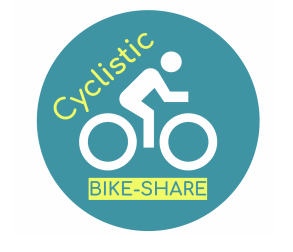

> ### Data Analysis by Caitlin Malloch
> ### Google Data Analytics Professional Certificate Capstone Project 1
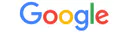

# Scenario
Cyclistic is a bike sharing company based in Chicago. As a junior data analyst on their marketing analytics team, the company asks you to find differences between the casual riders and membership riders using the dataset found at the link below. Provide insights and recommendations for Cyclistic based on the differences found between the two user types. 

Dataset: http://divvy-tripdata.s3.amazonaws.com/index.html. 


# Objective

Identify how annual members and casual riders use Cyclistic bikes differently.

# Data Cleaning

In [6]:
library(tidyverse) #Load tidyverse packages for cleaning and analysis

In [7]:
library(lubridate) #This package helps clean date formats in the data before analysis

In [8]:
#load the files from the cyclistic dataset
q1_2020 <- read.csv('../input/cyclistic-12-months-dataset/Divvy_Trips_2020_Q1/Divvy_Trips_2020_Q1.csv')
q2_2019 <- read.csv('../input/cyclistic-12-months-dataset/Divvy_Trips_2019_Q2.csv/Divvy_Trips_2019_Q2.csv')
q3_2019 <- read.csv('../input/cyclistic-12-months-dataset/Divvy_Trips_2019_Q3/Divvy_Trips_2019_Q3.csv')
q4_2019 <- read.csv('../input/cyclistic-12-months-dataset/Divvy_Trips_2019_Q4/Divvy_Trips_2019_Q4.csv') 

In [9]:
#check the column names
colnames(q1_2020)
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)

In [10]:
#Clean column names
q1<- q1_2020 %>% 
     select(ride_id,started_at,ended_at,member_casual,start_station_id,end_station_id,
           start_station_name,end_station_name)
colnames(q1)

In [11]:
#Clean column names to be consistent with all other 3 files
q2<-q2_2019%>%
    select( 'X01...Rental.Details.Rental.ID',
            'X01...Rental.Details.Local.Start.Time', 
            'X01...Rental.Details.Local.End.Time',  
            'X03...Rental.Start.Station.Name', 
            'X03...Rental.Start.Station.ID',
            'X02...Rental.End.Station.Name', 
            'X02...Rental.End.Station.ID', 
            'User.Type' )%>%
    rename( ride_id = 'X01...Rental.Details.Rental.ID',
            started_at = 'X01...Rental.Details.Local.Start.Time',  
            ended_at = 'X01...Rental.Details.Local.End.Time',  
            start_station_name = 'X03...Rental.Start.Station.Name',
            start_station_id = 'X03...Rental.Start.Station.ID',
            end_station_name = 'X02...Rental.End.Station.Name', 
            end_station_id = 'X02...Rental.End.Station.ID',
            member_casual = 'User.Type')
colnames(q2)

In [12]:
#update column names to be consistent with other files
q3<- q3_2019 %>%
   select  (trip_id,
            start_time,  
            end_time,  
            from_station_name, 
            from_station_id, 
            to_station_name, 
            to_station_id, 
            usertype )%>%
    rename( ride_id = trip_id,
            started_at = start_time,  
            ended_at = end_time, 
            start_station_name = from_station_name, 
            start_station_id = from_station_id, 
            end_station_name = to_station_name, 
            end_station_id = to_station_id, 
            member_casual = usertype)
colnames(q3)

In [13]:
#update column names to be consistent with other files
q4<-q4_2019%>%
    select( trip_id,
            start_time,  
            end_time,  
            from_station_name, 
            from_station_id, 
            to_station_name, 
            to_station_id, 
            usertype )%>%
    rename( ride_id = trip_id,
            started_at = start_time,  
            ended_at = end_time, 
            start_station_name = from_station_name, 
            start_station_id = from_station_id, 
            end_station_name = to_station_name, 
            end_station_id = to_station_id, 
            member_casual = usertype)
colnames(q4)

In [14]:
#inspect dataframes q1, q2, q3, and q4
str(q1)
str(q2)
str(q3)
str(q4) 

In [15]:
#convert data types for consistency to be stackable, ride_id is currently showing as an int so we need it to be a character like in q1
q2 <-  mutate(q2, ride_id = as.character(ride_id))
q3 <-  mutate(q3, ride_id = as.character(ride_id))
q4 <-  mutate(q4, ride_id = as.character(ride_id))

In [16]:
#use rbind to combine the dataset into one dataframe
all_data <- rbind(q1,q2,q3,q4)
head(all_data,2)

In [17]:
#get dimensions of the dataframe
dim(all_data)

In [18]:
#mutate the member_casual column with the recode function 
all_data <-  all_data %>% 
    mutate(member_casual = recode(member_casual
                                  ,"Subscriber" = "member"
                                  ,"Customer" = "casual"))

In [19]:
#get table info
table(all_data$member_casual)

In [20]:
#clean time formatting for started_at
all_data<-mutate(all_data,started_at=as.POSIXlt(started_at))

In [21]:
#clean time formatting for ended_at
all_data<-mutate(all_data,ended_at=as.POSIXlt(ended_at))

In [22]:
#check the dataframe all_data
head(all_data,2)

# Data Processing

In [23]:
#seperate date into seperate columns for analysis
all_data$day <- format(all_data$started_at, "%d")
all_data$day_of_week <- format(all_data$started_at,"%A")
all_data$month <- format(all_data$started_at, "%m")
all_data$monthName <- format(all_data$started_at,"%b")
all_data$hour <- format(all_data$started_at,"%H")
all_data$year <- format(all_data$started_at,"%Y")
head(all_data,2)

In [24]:
#create ride length for analysis
all_data$ride_length <- round(difftime(all_data$ended_at,all_data$started_at,units="mins"),0)

In [25]:
#check the dataframe for ride_length
head(all_data,2)

In [26]:
#clean ride_length to remove negative values or repairs/quality check-ups
all_data_v1 <- all_data[!(all_data$start_station_name == "HQ QR" | all_data$ride_length<0),]

In [ ]:
#convert the ride length to numeric
all_data_v1$ride_length <- as.numeric(as.character(all_data_v1$ride_length))
is.numeric(all_data_v1$ride_length)

In [29]:
#create a file that can be used in Tableau
write.csv(all_data_v1,'Divvy_Clean_Data.csv')

# Data Analysis

In [28]:
#analyze casual and member memberships
all_data_v1%>% 
group_by(member_casual)%>%
summarise(number_of_rides=n(),
         max_ride=max(ride_length),
         min_ride=min(ride_length),
         average_ride=mean(ride_length))

There are more member riders than casual riders, however the duration of the average ride is longer for casual members. 

In [30]:
#arrange by month
all_data_v1 %>% 
    mutate(month = month(started_at, label = TRUE)) %>% 
    group_by(member_casual, month) %>% 
    summarise(number_of_rides = n()
              ,average_duration = mean(ride_length),.groups="keep") %>% 
    arrange(member_casual, month)

In [34]:
#plot the previous findings
all_data_v1 %>% 
    mutate(month = month(started_at, label = TRUE)) %>% 
    group_by(member_casual,month ) %>% 
    summarise(average_duration = mean(ride_length),.groups="keep") %>% 
    arrange(member_casual, month)  %>% 
    ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Average Ride Length by Month for Different User Types")

We can clearly see that member riders use a consistent average duration of ride time over the course of the year, with causal members showing an increase in average ride lengths during the winter months of January and February, with lower average ride times during the rest of the year. 

In [33]:
#plot by user type
all_data_v1 %>% 
    mutate(month = month(started_at, label = TRUE)) %>% 
    group_by(member_casual,month ) %>% 
    summarise(number_of_rides = n(),.groups="keep") %>% 
    arrange(member_casual, month)  %>% 
    ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Number of Rides by Month for Different User Types")

This plot shows members using a greater number of rides, especially in the summer months. The number of casual rides is lower, but shows a similar increase during the summer months. 

In [35]:
#arrange by day of the week
all_data_v1 %>% 
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual, weekday) %>% 
    summarise(number_of_rides = n()
              ,average_duration = mean(ride_length),.groups="keep") %>% 
    arrange(member_casual, weekday)

In [42]:
#plot by day of week 
all_data_v1 %>% 
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual,weekday) %>% 
    summarise(average_duration = mean(ride_length),.groups="keep") %>% 
    arrange(member_casual, weekday)  %>% 
    ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Average Ride Length by Weekday for Different User Types")

There is a trend showing casual riders with a longer average duration throughout the week. 
Saturday is the highest average duration for members, while Friday is the longest average duration for casual riders. 

In [40]:
#arrange and plot by different user type
all_data_v1 %>% 
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual,weekday) %>% 
    summarise(number_of_rides = n(),.groups="keep") %>% 
    arrange(member_casual, weekday)  %>% 
    ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Average Ride Length by Number of Rides for Different User Types")

Members have a higher number of rides on weekdays, with a lower number of rides throughout the weekend. 
Casual riders tend to have a slightly higher number of rides during the weekend, with lower number of rides during the week. 

In [38]:
#arrange by hour 
all_data_v1 %>% 
    mutate(hour = hour(started_at)) %>% 
    group_by(member_casual, hour) %>% 
    summarise(number_of_rides = n()
              ,average_duration = mean(ride_length),.groups="keep") %>% 
    arrange(member_casual, hour)

In [41]:
#plot by hour
all_data_v1 %>% 
    mutate(hour = hour(started_at)) %>% 
    group_by(member_casual,hour) %>% 
    summarise(average_duration = mean(ride_length),.groups="keep") %>% 
    arrange(member_casual, hour)  %>% 
    ggplot(aes(x = hour, y = average_duration, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Average Ride Length by Hour for Different User Types")

From this plot, we can see that both members and casual riders have the longest duration of use during the morning hours of midnight through until 6 am. 

In [43]:
#arrange by rides by hour for different user types and plot
all_data_v1 %>% 
    mutate(hour = hour(started_at)) %>% 
    group_by(member_casual,hour) %>% 
    summarise(number_of_rides = n(),.groups="keep") %>% 
    arrange(member_casual, hour)  %>% 
    ggplot(aes(x = hour, y = number_of_rides, fill = member_casual)) +
    geom_col(position = "dodge")+labs(title="Number of Rides by Hour for Different User Types")

More specifically, we can see that the number of rides increase between 7-9 am and 3-6 pm for members. One reason for this could be the use of the bikes for worker commutes, as these are typically high traffic times for work commutes. 

Casual riders are more likely to ride between noon and 5 pm, so a slight trend is found during daytime hours in the afternoon. 

# Recommendations for Cyclistic Bike Share

Casual riders have longer average ride duration as opposed to members. This means that marketing should be targeting points or other incentives for longer rides for casual members. 

The highest number of rides was found in **summer** for both casual and member riders, so promotions should be held during these months when revenue will be high. Weather appears to affect ridership and it has a sharp decrease during the winter months. 

Members tend to ride during the **weekdays**, as opposed to casual riders on the **weekends**. This means that casual riders should recieve targeted promotions during the weekend, such as deals and other benefits. Members should be marketed towards during the week. It is likely most members are using this bike share for their work commute. 

The longest ride length is on Saturdays for casual riders and Fridays for members. Fridays and Saturdays should be days with promotions for longer rides. 

**Peak times (members)**: Between *6:00 am- 9:00 am* and *3:00 pm- 6:00 pm*. 
**Peak times (casual riders)**: Between *12:00 pm and 5:00 pm*. 



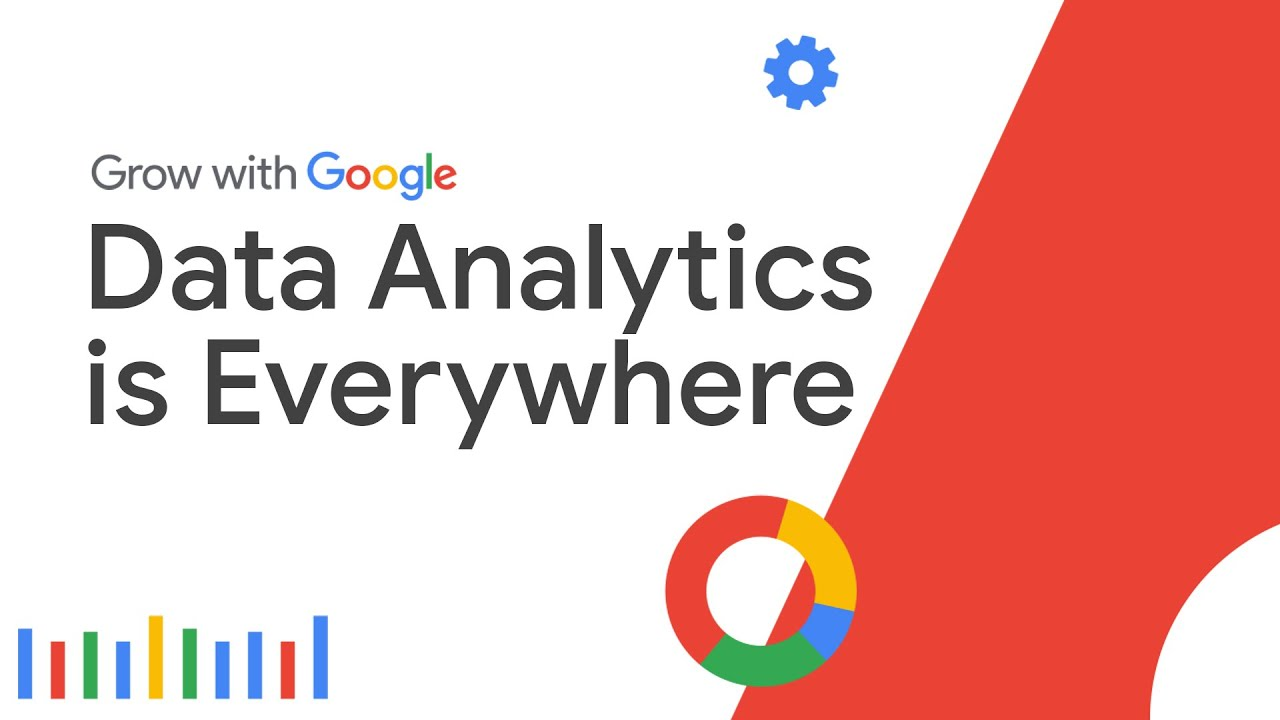

> Completed April 2022 by Caitlin Malloch